In [1]:
from DataParser import DataParser
import numpy as np
import scipy.sparse as sps
from sklearn.model_selection import KFold

from Data_manager.split_functions.split_train_validation_random_holdout import \
split_train_in_two_percentage_global_sample

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from SimpleEvaluator import evaluator
from Base.Evaluation.Evaluator import EvaluatorHoldout

In [2]:
from Base.NonPersonalizedRecommender import TopPop, Random
from Hybrid.HybridCombinationSearchCV import HybridCombinationSearchCV
from KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
from KNN.UserKNNCFRecommender import UserKNNCFRecommender
from KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from KNN.SpecialItemKNNCBFRecommender import SpecialItemKNNCBFRecommender
from MatrixFactorization.IALSRecommender import IALSRecommender
from SLIM_BPR.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from SLIM_ElasticNet.SLIMElasticNetRecommender import SLIMElasticNetRecommender
from SLIM_ElasticNet.SSLIM_ElasticNet import SSLIMElasticNet
from GraphBased.P3alphaRecommender import P3alphaRecommender
from GraphBased.RP3betaRecommender import RP3betaRecommender
from MatrixFactorization.Cython.MatrixFactorization_Cython import MatrixFactorization_BPR_Cython, MatrixFactorization_FunkSVD_Cython
from MatrixFactorization.PureSVDRecommender import PureSVDRecommender, PureSVDItemRecommender
from MatrixFactorization.NMFRecommender import NMFRecommender
from KNN.ItemKNN_CBF_CF import ItemKNN_CBF_CF

In [3]:
seed = 1666
parser = DataParser()

URM_all = parser.get_URM_all()
ICM_all = parser.get_ICM_all()

#URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage=0.85, seed=seed)

In [4]:
rp3b = (RP3betaRecommender, {'topK': 926, 'alpha': 0.4300109351916609, 'beta': 0.01807360750913967, 'normalize_similarity': False})
p3a = (P3alphaRecommender, {'topK': 575, 'alpha': 0.48009885897470206, 'normalize_similarity': False})
icf = (ItemKNNCFRecommender, {'topK': 1000, 'shrink': 1000, 'similarity': 'cosine', 'normalize': True, 'feature_weighting': 'TF-IDF'})
ucf = (UserKNNCFRecommender, {'topK': 163, 'shrink': 846, 'similarity': 'cosine', 'normalize': True, 'feature_weighting': 'TF-IDF'})
icb = (ItemKNNCBFRecommender, {'topK': 164, 'shrink': 8, 'similarity': 'jaccard', 'normalize': True})
sbpr = (SLIM_BPR_Cython, {'topK': 1000, 'epochs': 130, 'symmetric': False, 'sgd_mode': 'adam', 'lambda_i': 1e-05, 'lambda_j': 1e-05, 'learning_rate': 0.0001})
icfcb = (ItemKNN_CBF_CF, {'topK': 1000, 'shrink': 1000, 'similarity': 'asymmetric', 'normalize': True, 'asymmetric_alpha': 0.241892724784089, 'feature_weighting': 'TF-IDF', 'icm_weight': 1.0})
sslim = (SSLIMElasticNet, {'beta': 0.567288665094892, 'topK': 1000, 'l1_ratio': 1e-05, 'alpha': 0.001})
psvd = (PureSVDRecommender, {'num_factors': 350})
icbsup = (SpecialItemKNNCBFRecommender, {'topK': 1000, 'shrink': 1000, 'similarity': 'cosine', 'normalize': True, 'feature_weighting': 'BM25'})

In [5]:
combo_labels ={
    'combo1': 'icb, icf, p3a',
    'combo2': 'icb, icf, rp3b',
    'combo3': 'icb, icf, ucf',
    'combo4': 'icb, rp3b, p3a',
    'combo5': 'icb, ucf, p3a', 
    'combo6': 'icb, ucf, rp3b',
    'combo7': 'icb, icfcb, icf',
    'combo8': 'icb, icfcb, p3a',
    'combo9': 'icb, icfcb, rp3b',
    'combo10': 'icb, icfcb, ucf',
    'combo11': 'icb, icfcb, sbpr',
    'combo12': 'icbsup, icfcb, icf',
    'combo13': 'icbsup, icfcb, p3a',
    'combo14': 'icbsup, icfcb, rp3b',
    'combo15': 'icbsup, icfcb, ucf',
    'combo16': 'icbsup, icfcb, sbpr',
    'combo17': 'icbsup, icf, p3a',
    'combo18': 'icbsup, icfcb, rp3b',
    'combo19': 'icbsup, icf, ucf',
    'combo20': 'icbsup, icf, sbpr',
    'combo21': 'icbsup, p3a, rp3b',
    'combo22': 'icbsuo, ucf, p3a',
    'combo23': 'icbsup, ucf, rp3b',
    'combo24': 'icbsup, ucf, sbpr',
    'combo25': 'icbsup, sbpr, sslim',
    'combo26': 'icbsup, p3a, sslim',
    'combo27': 'icbsup, ucf, sslim',
    'combo28': 'icbsup, icf, sslim',
    'combo29': 'icbsup, icfcb, sslim',
    'combo30': 'icbsup, rp3b, sslim',
    'combo31': 'icb, sbpr, sslim',
    'combo32': 'icb, rp3b, sslim',
    'combo33': 'icb, p3a, sslim',
    'combo34': 'rp3b',
    'combo35': 'p3a',
    'combo36': 'icf',
    'combo37': 'ucf',
    'combo38': 'icb',
    'combo39': 'sbpr',
    'combo40': 'icfcb',
    'combo41': 'sslim',
    'combo42': 'psvd',
    'combo43': 'icbsup',
}

In [6]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=seed)

URM_list = []
URM_test_list = []
evaluator_list = []

shape = URM_all.shape
indptr = URM_all.indptr
indices = URM_all.indices
data = URM_all.data

for train_index, test_index in kf.split(data):
    data_train = np.ones(data.shape)
    data_test = np.ones(data.shape)
    data_train[test_index] = 0
    data_test[train_index] = 0
    kf_train = sps.csr_matrix((data_train, indices, indptr), shape=shape).copy()
    kf_test = sps.csr_matrix((data_test, indices, indptr), shape=shape).copy()
    kf_train.eliminate_zeros()
    kf_test.eliminate_zeros()
    URM_list.append(kf_train)
    URM_test_list.append(kf_test)
    evaluator_list.append(EvaluatorHoldout(kf_test, cutoff_list=[10]))

In [13]:
list_rec = [([icb, icf, p3a], {'alpha': 0.44569420382449637, 'l1_ratio': 0.6168742754254437}),
            ([icb, icf, rp3b], {'alpha': 0.3033751201293658, 'l1_ratio': 0.7822655054333012}),
            ([icb, icf, ucf], {'alpha': 0.48973465405541533, 'l1_ratio': 0.3567553681370489}),
            ([icb, rp3b, p3a], {'alpha': 0.6171935935379741, 'l1_ratio': 0.4090970817953153}),
            ([icb, ucf, p3a], {'alpha': 0.6310254748569911, 'l1_ratio': 0.42318219644561506}),
            ([icb, ucf, rp3b], {'alpha': 0.5388201552532741, 'l1_ratio': 0.35597718538152645}),
            ([icb, icfcb, icf], {'alpha': 0.9457062373092435, 'l1_ratio': 0.08675668683308081}),
            ([icb, icfcb, p3a], {'alpha': 0.6904008032335807, 'l1_ratio': 0.23371348584724985}),
            ([icb, icfcb, rp3b], {'alpha': 0.8129428861277737, 'l1_ratio': 0.14069122456123387}),
            ([icb, icfcb, ucf], {'alpha': 0.8129428861277737, 'l1_ratio': 0.14069122456123387}),
            ([icb, icfcb, sbpr], {'alpha': 0.8991751672246813, 'l1_ratio': 0.11874637825106651}),
            ([icbsup, icfcb, icf], {'alpha': 0.8122492419947548, 'l1_ratio': 0.1448868067763832}),
            ([icbsup, icfcb, p3a], {'alpha': 0.6094679138906033, 'l1_ratio': 0.41715098578193194}),
            ([icbsup, icfcb, rp3b], {'alpha': 0.5369911284211629, 'l1_ratio': 0.45078644454282}),
            ([icbsup, icfcb, ucf], {'alpha': 0.7020854096807992, 'l1_ratio': 0.20749665943340362}),
            ([icbsup, icfcb, sbpr], {'alpha': 0.7949204415356104, 'l1_ratio': 0.2705694962114903}),
            ([icbsup, icf, p3a], {'alpha': 0.4973334775913678, 'l1_ratio': 0.6790274919219236}),
            ([icbsup, icfcb, rp3b], {'alpha': 0.45931982254221104, 'l1_ratio': 0.552400663560699}),
            ([icbsup, icf, ucf], {'alpha': 0.5934342246244017, 'l1_ratio': 0.38793882442583466}),
            ([icbsup, icf, sbpr], {'alpha': 0.8170119826252383, 'l1_ratio': 0.33586027250410305}),
            ([icbsup, p3a, rp3b], {'alpha': 0.4001101186128191, 'l1_ratio': 0.9989082076640393}),
            ([icbsup, ucf, p3a], {'alpha': 0.627349023025726, 'l1_ratio': 0.5343474311262314}),
            ([icbsup, ucf, rp3b], {'alpha': 0.5574853559798421, 'l1_ratio': 0.5221328226891215}),
            ([icbsup, ucf, sbpr], {'alpha': 0.9033873534648698, 'l1_ratio': 0.30678626017844307}),
            ([icbsup, sbpr, sslim], {'alpha': 0.6194113348305054, 'l1_ratio': 0.6156379091138154}),
            ([icbsup, p3a, sslim], {'alpha': 0.7989350513339316, 'l1_ratio': 0.4461703935735907}),
            ([icbsup, ucf, sslim], {'alpha': 0.7362031685050584, 'l1_ratio': 0.3394266517525301}),
            ([icbsup, icf, sslim], {'alpha': 0.6383024036201149, 'l1_ratio': 0.5132363657816151}),
            ([icbsup, icfcb, sslim], {'alpha': 0.8162670192627814, 'l1_ratio': 0.26730373918567046}),
            ([icbsup, rp3b, sslim], {'alpha': 0.7881737847053779, 'l1_ratio': 0.400772981812612}),
            ([icb, sbpr, sslim], {'alpha': 0.5238332406148302, 'l1_ratio': 0.5907932058981844}),
            ([icb, rp3b, sslim], {'alpha': 0.7861575718386372, 'l1_ratio': 0.34264216397962627}),
            ([icb, p3a, sslim], {'alpha': 0.6325200648079097, 'l1_ratio': 0.4685932097360991}),
            rp3b,
            p3a,
            icf,
            ucf,
            icb,
            sbpr,
            icfcb,
            sslim,
            psvd,
            icbsup,
]

In [14]:
num_combo = len(list_rec)

In [9]:
f_ranges = [
    (0,3),
    (3,5),
    (5,10),
    (10,17),
    (17,30),
    (30,100),
    (100,200),
    (200,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            if not isinstance(list_rec[k][0], list):
                rec = list_rec[k][0]
                try:
                    rec = rec(URM_list[i], ICM_all, verbose = False)
                except:
                    rec = rec(URM_list[i], verbose=False)
                try:
                    rec.load_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
                    print(f"{rec.RECOMMENDER_NAME} loaded. [seed={seed}, fold={i}]")
                except:
                    print(f"Fitting {rec.RECOMMENDER_NAME} ... [seed={seed}, fold={i}]")
                    rec.fit(**list_rec[k][1])
                    print(f"done.")
                    rec.save_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
            else:
                rec = HybridCombinationSearchCV(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
                rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.04 sec. Users per second: 1096
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.01 sec. Users per second: 1058
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorH

EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.00 sec. Users per second: 1127
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 0.98 sec. Users per second: 1116
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 0.95 sec. Users per second: 1114
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. 

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.12 sec. Users per second: 1019
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.01 sec. Users per second: 1058
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.06 sec. Users per second: 1071
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: 

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.05 sec. Users per second: 1035
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.06 sec. Users per second: 999
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.17 sec. Users per second: 980
HybridCombinationSearchCV: URM Detect

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.05 sec. Users per second: 1015
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.10 sec. Users per second: 1026
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.06 sec. Users per second: 1029
HybridCombinationSearchCV: URM Dete

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.04 sec. Users per second: 1020
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.10 sec. Users per second: 1039
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.03 sec. Users per second: 1037
HybridCombinationSearchCV: URM Detected 56 (0.70 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.09 sec. Users per second: 1040
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.07 sec. Users per second: 1020
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.01 sec. Users per second: 1052
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.57 sec. Users per second: 728
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.44 sec. Users per second: 740
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.55 sec. Users per second: 730
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridComb

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.51 sec. Users per second: 724
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.48 sec. Users per second: 717
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.58 sec. Users per second: 724
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold u

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.48 sec. Users per second: 725
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.51 sec. Users per second: 750
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.51 sec. Users per second: 722
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridComb

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.04 sec. Users per second: 984
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 0.97 sec. Users per second: 1018
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.00 sec. Users per second: 1014
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.02 sec. Users per second: 984
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.07 sec. Users per second: 950
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.05 sec. Users per second: 973
HybridCombinationSearchCV: URM Detected

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.02 sec. Users per second: 962
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.09 sec. Users per second: 936
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.04 sec. Users per second: 960
HybridCombinationSearchCV: URM Detected 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.08 sec. Users per second: 937
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.12 sec. Users per second: 919
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.02 sec. Users per second: 968
HybridCombinationSearchCV: URM Detected 68 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.08 sec. Users per second: 937
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.04 sec. Users per second: 959
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.07 sec. Users per second: 949
HybridCombinationSearchCV: URM Detected 77 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.05 sec. Users per second: 973
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.01 sec. Users per second: 977
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.03 sec. Users per second: 982
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
H

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.42 sec. Users per second: 702
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.52 sec. Users per second: 669
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.54 sec. Users per second: 666
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
Hybri

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.41 sec. Users per second: 700
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.56 sec. Users per second: 652
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.44 sec. Users per second: 692
HybridCombinationSearchCV: URM Detected 65 (0.82 %) 

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.56 sec. Users per second: 652
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.47 sec. Users per second: 700
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.32 sec. Users per second: 745
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombi

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.63 sec. Users per second: 937
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.65 sec. Users per second: 944
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 1.67 sec. Users per second: 930
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 1.57 sec. Users per second: 970
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.73 sec. Users per second: 895
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.72 sec. Users per second: 891
HybridCombinationSearchCV: URM Detected 56 (0.

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.76 sec. Users per second: 884
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 1.73 sec. Users per second: 901
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 1.97 sec. Users per second: 773
HybridCombinationSearchCV: URM Detecte

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.99 sec. Users per second: 778
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.93 sec. Users per second: 792
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.96 sec. Users per second: 794
HybridCombinationSearchCV: URM Detected 65 (

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 1.81 sec. Users per second: 861
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 1.74 sec. Users per second: 874
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.84 sec. Users per second: 839
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.82 sec. Users per second: 843
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.85 sec. Users per second: 843
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 1.92 sec. Users per second: 810
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
Hybr

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 1.75 sec. Users per second: 869
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 2.54 sec. Users per second: 607
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.46 sec. Users per second: 622
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.


Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 2.44 sec. Users per second: 637
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 2.45 sec. Users per second: 636
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 2.47 sec. Users per second: 616
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
Hybr

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 2.25 sec. Users per second: 687
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.51 sec. Users per second: 610
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 2.29 sec. Users per second: 680
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridComb

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 0.91 sec. Users per second: 879
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 820 ( 100.00% ) in 0.94 sec. Users per second: 875
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 812 ( 100.00% ) in 0.90 sec. Users per second: 903
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 0.86 sec. Users per second: 910
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 810 ( 100.00% ) in 0.87 sec. Users per second: 926
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 0.86 sec. Users per second: 933
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
H

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 820 ( 100.00% ) in 1.04 sec. Users per second: 788
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 812 ( 100.00% ) in 1.00 sec. Users per second: 810
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 0.96 sec. Users per second: 814
HybridCombinationSearchCV: URM Detected 56 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 810 ( 100.00% ) in 1.15 sec. Users per second: 702
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 1.17 sec. Users per second: 689
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 820 ( 100.00% ) in 1.16 sec. Users per second: 705
HybridCombinationSearchCV: URM Detected 48 (0.6

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 812 ( 100.00% ) in 1.05 sec. Users per second: 771
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 1.00 sec. Users per second: 783
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 810 ( 100.00% ) in 1.04 sec. Users per second: 780
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
H

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 1.13 sec. Users per second: 710
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 820 ( 100.00% ) in 1.13 sec. Users per second: 729
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 812 ( 100.00% ) in 1.18 sec. Users per second: 688
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 1.05 sec. Users per second: 748
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 810 ( 100.00% ) in 1.08 sec. Users per second: 752
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 1.05 sec. Users per second: 769
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 820 ( 100.00% ) in 1.38 sec. Users per second: 595
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 812 ( 100.00% ) in 1.41 sec. Users per second: 576
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 1.36 sec. Users per second: 576
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridC

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 810 ( 100.00% ) in 1.32 sec. Users per second: 612
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 1.32 sec. Users per second: 610
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 820 ( 100.00% ) in 1.38 sec. Users per second: 592
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridC

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 0.71 sec. Users per second: 806
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 0.78 sec. Users per second: 766
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 569 ( 100.00% ) in 0.76 sec. Users per second: 749
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
H

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 582 ( 100.00% ) in 0.66 sec. Users per second: 876
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 592 ( 100.00% ) in 0.69 sec. Users per second: 863
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 0.66 sec. Users per second: 864
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
H

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 0.90 sec. Users per second: 666
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 569 ( 100.00% ) in 0.89 sec. Users per second: 639
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 582 ( 100.00% ) in 0.94 sec. Users per second: 617
HybridCombinationSearchCV: URM Detected 77 (0.9

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 592 ( 100.00% ) in 1.02 sec. Users per second: 578
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 0.94 sec. Users per second: 610
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 1.03 sec. Users per second: 578
HybridCombinationSearchCV: URM Detected 56 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 569 ( 100.00% ) in 1.00 sec. Users per second: 568
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 582 ( 100.00% ) in 1.02 sec. Users per second: 571
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 592 ( 100.00% ) in 1.04 sec. Users per second: 567
HybridCombinationSearchCV: URM Detected 4

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 1.01 sec. Users per second: 569
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 0.99 sec. Users per second: 604
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 569 ( 100.00% ) in 0.92 sec. Users per second: 618
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 582 ( 100.00% ) in 0.86 sec. Users per second: 681
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 592 ( 100.00% ) in 0.86 sec. Users per second: 687
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 0.87 sec. Users per second: 657
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 1.21 sec. Users per second: 494
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 569 ( 100.00% ) in 1.16 sec. Users per second: 491
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 582 ( 100.00% ) in 1.18 sec. Users per second: 492
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridC

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 592 ( 100.00% ) in 1.23 sec. Users per second: 482
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 1.10 sec. Users per second: 519
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 1.16 sec. Users per second: 514
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCom

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 464 ( 100.00% ) in 0.72 sec. Users per second: 648
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.70 sec. Users per second: 647
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.70 sec. Users per second: 644
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
H

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 461 ( 100.00% ) in 0.63 sec. Users per second: 729
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 447 ( 100.00% ) in 0.61 sec. Users per second: 734
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 464 ( 100.00% ) in 0.64 sec. Users per second: 727
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
H

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.82 sec. Users per second: 550
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.84 sec. Users per second: 541
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 461 ( 100.00% ) in 0.87 sec. Users per second: 532
HybridCombinationSearchCV: URM Detected 68 (0.8

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 447 ( 100.00% ) in 1.03 sec. Users per second: 434
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 464 ( 100.00% ) in 1.08 sec. Users per second: 428
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.05 sec. Users per second: 430
HybridCombinationSearchCV: URM Detected 7

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.98 sec. Users per second: 461
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 461 ( 100.00% ) in 1.11 sec. Users per second: 416
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 447 ( 100.00% ) in 1.09 sec. Users per second: 412
HybridCombinationSearchCV: URM Detected 5

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 464 ( 100.00% ) in 0.88 sec. Users per second: 528
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.84 sec. Users per second: 538
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 0.84 sec. Users per second: 536
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 461 ( 100.00% ) in 0.84 sec. Users per second: 549
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 447 ( 100.00% ) in 0.82 sec. Users per second: 544
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 464 ( 100.00% ) in 0.85 sec. Users per second: 549
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
H

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.18 sec. Users per second: 382
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.20 sec. Users per second: 378
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 461 ( 100.00% ) in 1.19 sec. Users per second: 389
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombi

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 447 ( 100.00% ) in 1.19 sec. Users per second: 375
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 464 ( 100.00% ) in 1.26 sec. Users per second: 368
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.20 sec. Users per second: 378
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombina

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.01 sec. Users per second: 448
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.16 sec. Users per second: 474
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.16 sec. Users per second: 480
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridC

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.16 sec. Users per second: 486
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.16 sec. Users per second: 506
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.16 sec. Users per second: 480
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridComb

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.21 sec. Users per second: 357
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.21 sec. Users per second: 360
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.21 sec. Users per second: 367
HybridCombinationSearchCV: URM Detected 65 (0.82 %

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.24 sec. Users per second: 331
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.24 sec. Users per second: 314
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.27 sec. Users per second: 274
HybridCombinationSearchCV: URM Detected 68 (

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.24 sec. Users per second: 313
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.24 sec. Users per second: 318
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.24 sec. Users per second: 325
HybridCombinationSearchCV: URM Detected 77 (

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.25 sec. Users per second: 302
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.21 sec. Users per second: 350
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.21 sec. Users per second: 354
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold u

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.19 sec. Users per second: 405
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.20 sec. Users per second: 399
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.20 sec. Users per second: 380
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
Hybr

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.35 sec. Users per second: 210
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.36 sec. Users per second: 209
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.40 sec. Users per second: 191
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinatio

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.42 sec. Users per second: 190
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.41 sec. Users per second: 183
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.38 sec. Users per second: 195
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.


ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.31 sec. Users per second: 241
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.32 sec. Users per second: 241
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.33 sec. Users per second: 238
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinatio

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.09 sec. Users per second: 309
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.09 sec. Users per second: 299
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.11 sec. Users per second: 256
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
Hybrid

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.15 sec. Users per second: 189
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.15 sec. Users per second: 178
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.16 sec. Users per second: 183
HybridCombinationSearchCV: URM Detected 48 (

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.14 sec. Users per second: 202
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.15 sec. Users per second: 189
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.15 sec. Users per second: 193
HybridCombinationSearchCV: URM Detected 65 (

HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.17 sec. Users per second: 157
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.16 sec. Users per second: 186
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold

HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.17 sec. Users per second: 162
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.17 sec. Users per second: 160
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3

HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.14 sec. Users per second: 206
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.09 sec. Users per second: 299
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: 

HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.27 sec. Users per second: 104
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.25 sec. Users per second: 107
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Proc

HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.29 sec. Users per second: 98
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.29 sec. Users per second: 96
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
Evalua

HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.22 sec. Users per second: 121
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.23 sec. Users per second: 124
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 

In [10]:
def check_if_present(key_list, el):
    for key_val, combo_val in key_list:
        if key_val == el[0] and combo_val == el[1]:
            return True
    return False

In [11]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    old_maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            old_maxp=maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
        elif value > old_maxp:
            difference=maxp - value
            old_maxp=value
            old_name=combo_labels['combo'+str(key+1)]
            old_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

RANGE (0, 3)
> MAP combo-icb, icf, p3a:	 0.06474931369262016
> MAP combo-icb, icf, rp3b:	 0.06500029236303792
> MAP combo-icb, icf, ucf:	 0.06363190600262157
> MAP combo-icb, rp3b, p3a:	 0.06510243113239321
> MAP combo-icb, ucf, p3a:	 0.06803465666239525
> MAP combo-icb, ucf, rp3b:	 0.0664798777960184
> MAP combo-icb, icfcb, icf:	 0.06869084116414374
> MAP combo-icb, icfcb, p3a:	 0.06877533145641564
> MAP combo-icb, icfcb, rp3b:	 0.06909548333186183
> MAP combo-icb, icfcb, ucf:	 0.06929929339228114
> MAP combo-icb, icfcb, sbpr:	 0.06963134653995043
> MAP combo-icbsup, icfcb, icf:	 0.06775322798478764
> MAP combo-icbsup, icfcb, p3a:	 0.06963275574616393
> MAP combo-icbsup, icfcb, rp3b:	 0.06996848023410623
> MAP combo-icbsup, icfcb, ucf:	 0.06853026425809057
> MAP combo-icbsup, icfcb, sbpr:	 0.0708910268185396
> MAP combo-icbsup, icf, p3a:	 0.06729558862627413
> MAP combo-icbsup, icfcb, rp3b:	 0.06960873049906709
> MAP combo-icbsup, icf, ucf:	 0.06539476428562532
> MAP combo-icbsup, icf

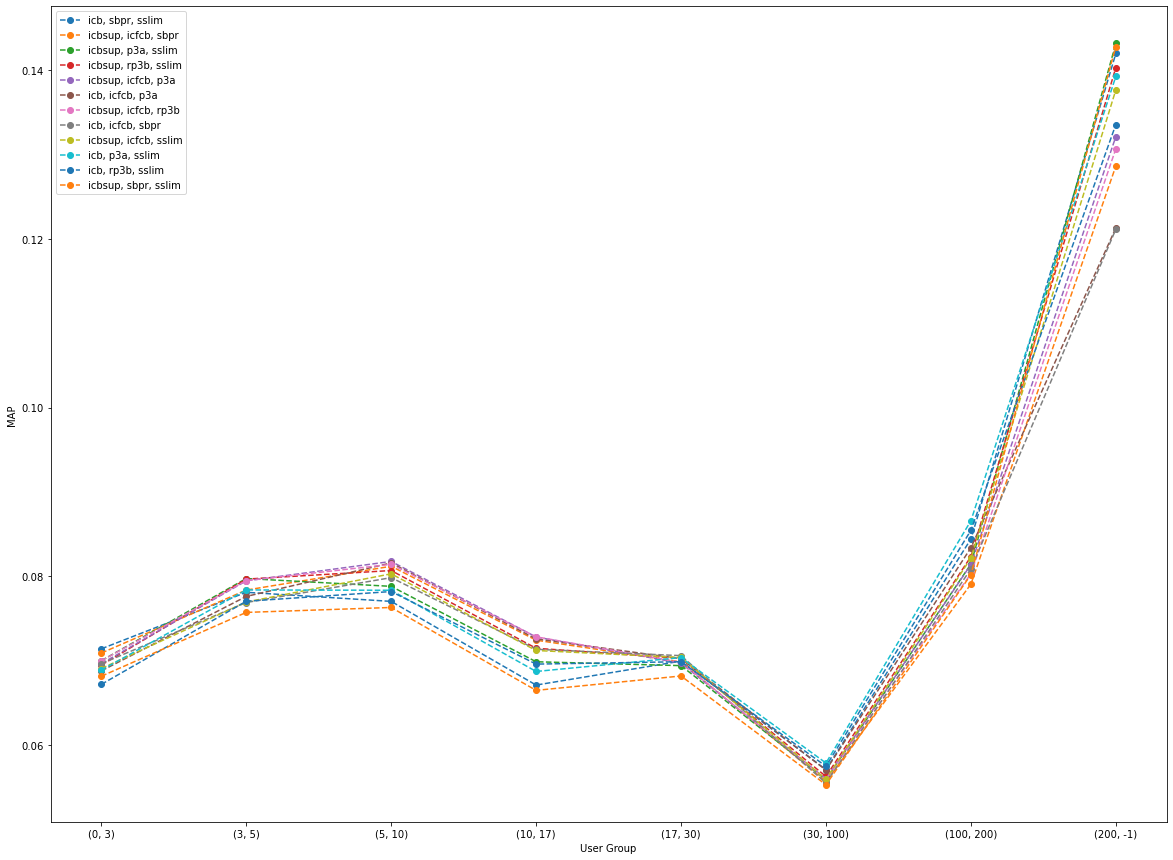

In [15]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,15))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        if random.random() > 0.5:
            style = '--o'
        else:
            style = '--x'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

In [7]:
f_ranges = [
    (0,20),
    (20,30),
    (30,40),
    (40,50),
    (50,60),
    (60,70),
    (70,80),
    (80,90),
    (90,100),
    (100,150),
    (150,-1)
]

for f_range in f_ranges:
    URM_test_group = parser.filter_URM_test_by_range(URM_list[0], URM_test_list[0], f_range)

---
### 5 balanced

In [25]:
f_ranges = [
    (0,4),
    (4,7),
    (7,13),
    (13,26),
    (26,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            if not isinstance(list_rec[k][0], list):
                rec = list_rec[k][0]
                try:
                    rec = rec(URM_list[i], ICM_all, verbose = False)
                except:
                    rec = rec(URM_list[i], verbose=False)
                try:
                    rec.load_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
                    print(f"{rec.RECOMMENDER_NAME} loaded. [seed={seed}, fold={i}]")
                except:
                    print(f"Fitting {rec.RECOMMENDER_NAME} ... [seed={seed}, fold={i}]")
                    rec.fit(**list_rec[k][1])
                    print(f"done.")
                    rec.save_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
            else:
                rec = HybridCombinationSearchCV(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
                rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1687 ( 100.00% ) in 1.63 sec. Users per second: 1032
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 1.66 sec. Users per second: 985
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHo

HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 1.79 sec. Users per second: 919
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1633 ( 100.00% ) in 1.82 sec. Users per second: 899
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout

EvaluatorHoldout: Processed 1687 ( 100.00% ) in 2.10 sec. Users per second: 804
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 1.89 sec. Users per second: 868
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1700 ( 100.00% ) in 1.93 sec. Users per second: 880
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_R

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 1.99 sec. Users per second: 825
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1633 ( 100.00% ) in 1.94 sec. Users per second: 840
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1687 ( 100.00% ) in 2.22 sec. Users per second: 759
HybridCombinationSearchCV: URM Detecte

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'stored_recommenders/seed_1666_hybrid_search/Special-ItemKNNCBFRec/.temp_DataIO__1666_fold-4/'

In [ ]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
        elif value > old_maxp:
            difference=maxp - value
            old_maxp=value
            old_name=combo_labels['combo'+str(key+1)]
            old_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

In [ ]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        if random.random() > 0.5:
            style = '--o'
        else:
            style = '--x'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

In [20]:
f_ranges = [
    (0,3),
    (3,5),
    (5,8),
    (8,17),
    (17,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            if not isinstance(list_rec[k][0], list):
                rec = list_rec[k][0]
                try:
                    rec = rec(URM_list[i], ICM_all, verbose = False)
                except:
                    rec = rec(URM_list[i], verbose=False)
                try:
                    rec.load_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
                    print(f"{rec.RECOMMENDER_NAME} loaded. [seed={seed}, fold={i}]")
                except:
                    print(f"Fitting {rec.RECOMMENDER_NAME} ... [seed={seed}, fold={i}]")
                    rec.fit(**list_rec[k][1])
                    print(f"done.")
                    rec.save_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
            else:
                rec = HybridCombinationSearchCV(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
                rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.10 sec. Users per second: 1039
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.00 sec. Users per second: 1069
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorH

EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.07 sec. Users per second: 1059
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.02 sec. Users per second: 1073
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.01 sec. Users per second: 1047
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. 

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.11 sec. Users per second: 1033
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.03 sec. Users per second: 1034
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.24 sec. Users per second: 915
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: U

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.16 sec. Users per second: 937
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.05 sec. Users per second: 1010
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.15 sec. Users per second: 993
HybridCombinationSearchCV: URM Detect

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.13 sec. Users per second: 947
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.17 sec. Users per second: 965
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.06 sec. Users per second: 1028
HybridCombinationSearchCV: URM Detect

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.08 sec. Users per second: 981
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.25 sec. Users per second: 919
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.09 sec. Users per second: 985
HybridCombinationSearchCV: URM Detected 56 (0.70 %) 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.10 sec. Users per second: 1029
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.06 sec. Users per second: 1030
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.00 sec. Users per second: 1054
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.59 sec. Users per second: 719
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.52 sec. Users per second: 703
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.56 sec. Users per second: 725
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridComb

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.64 sec. Users per second: 665
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.50 sec. Users per second: 704
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.59 sec. Users per second: 721
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold u

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.45 sec. Users per second: 738
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.53 sec. Users per second: 742
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.52 sec. Users per second: 719
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridComb

SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 0.59 sec. Users per second: 1842
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 0.60 sec. Users per second: 1772
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 0.68 sec. Users per second: 1675
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 0.60 sec. Users per second: 1770
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 0.67 sec. Users per second: 1687
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 0.61 sec. Users per second: 1778
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 0.66 sec. Users per second: 1599
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldou

EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.01 sec. Users per second: 1010
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 0.96 sec. Users per second: 1038
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.00 sec. Users per second: 1016
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loade

P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.00 sec. Users per second: 1024
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 0.95 sec. Users per second: 1037
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.02 sec. Users per second: 1001
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded.

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.06 sec. Users per second: 941
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.10 sec. Users per second: 924
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.15 sec. Users per second: 894
HybridCombinationSearchCV: URM Detected 48 (0

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.08 sec. Users per second: 908
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.11 sec. Users per second: 912
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.09 sec. Users per second: 918
HybridCombinationSearchCV: URM Detected 65 (0.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.11 sec. Users per second: 918
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.09 sec. Users per second: 941
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.03 sec. Users per second: 958
HybridCombinationSearchCV: URM Detected 68 (0.8

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.11 sec. Users per second: 912
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.13 sec. Users per second: 886
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.21 sec. Users per second: 842
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.18 sec. Users per second: 868
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.02 sec. Users per second: 961
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.10 sec. Users per second: 924
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.38 sec. Users per second: 723
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.55 sec. Users per second: 656
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.63 sec. Users per second: 630
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
Hybri

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.47 sec. Users per second: 671
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.67 sec. Users per second: 610
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.42 sec. Users per second: 705
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
Hybrid

P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 0.57 sec. Users per second: 1766
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 0.59 sec. Users per second: 1733
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 0.64 sec. Users per second: 1596
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 0.62 sec. Users per second: 1584
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 0.59 sec. Users per second: 1734
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 0.63 sec. Users per second: 1598
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 0.60 sec. Users per second: 1703
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 0.

PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 0.75 sec. Users per second: 1334
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 0.80 sec. Users per second: 1278
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 0.76 sec. Users per second: 1348
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 0.64 sec. Users per second: 1526
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 0.67 sec. Users per second: 1519
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 0.63 sec. Users per second: 1578
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 0.65 sec. Users per second: 1567
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) 

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 1.19 sec. Users per second: 984
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1159 ( 100.00% ) in 1.28 sec. Users per second: 907
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1171 ( 100.00% ) in 1.24 sec. Users per second: 948
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.


ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1181 ( 100.00% ) in 1.36 sec. Users per second: 871
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 1.61 sec. Users per second: 742
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 1.39 sec. Users per second: 844
HybridCombinationSearchCV: URM Detecte

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1159 ( 100.00% ) in 1.36 sec. Users per second: 851
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1171 ( 100.00% ) in 1.38 sec. Users per second: 850
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1181 ( 100.00% ) in 1.41 sec. Users per second: 839
HybridCombinationSearchCV: URM Detecte

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 1.41 sec. Users per second: 848
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 1.45 sec. Users per second: 811
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1159 ( 100.00% ) in 1.43 sec. Users per second: 812
HybridCombinationSearchCV: URM Detected 68

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1171 ( 100.00% ) in 1.42 sec. Users per second: 823
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1181 ( 100.00% ) in 1.42 sec. Users per second: 833
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 1.46 sec. Users per second: 818
HybridCombinationSearchCV: URM Detected 77 (

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 1.35 sec. Users per second: 870
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1159 ( 100.00% ) in 1.32 sec. Users per second: 876
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1171 ( 100.00% ) in 1.32 sec. Users per second: 888
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.


Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1181 ( 100.00% ) in 1.88 sec. Users per second: 628
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 2.01 sec. Users per second: 594
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 2.07 sec. Users per second: 567
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
Hybr

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1159 ( 100.00% ) in 2.06 sec. Users per second: 562
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1171 ( 100.00% ) in 2.03 sec. Users per second: 578
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1181 ( 100.00% ) in 1.95 sec. Users per second: 604
HybridCombinationSearchCV: URM Detected 65 (0.82 %

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 1.86 sec. Users per second: 641
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 1.80 sec. Users per second: 652
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1159 ( 100.00% ) in 1.75 sec. Users per second: 662
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridComb

EvaluatorHoldout: Processed 1181 ( 100.00% ) in 0.67 sec. Users per second: 1764
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 0.67 sec. Users per second: 1780
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 0.66 sec. Users per second: 1783
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1159 ( 100.00% ) in 0.70 sec. Users per second: 1666
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1171 ( 100.00% ) in 0.70 sec. Users per second: 1670
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1181 ( 100.00% ) in 0.70 sec. Users per second: 1690
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 0.74 sec. Users per second: 1610
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1175 ( 100.00% ) in 0.77 sec. Users per second: 1532
ItemKNN

HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 1.43 sec. Users per second: 815
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1197 ( 100.00% ) in 1.37 sec. Users per second: 873
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHol

EvaluatorHoldout: Processed 1145 ( 100.00% ) in 1.22 sec. Users per second: 939
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 1.29 sec. Users per second: 921
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 1.26 sec. Users per second: 929
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded.

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 1.52 sec. Users per second: 767
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1197 ( 100.00% ) in 1.67 sec. Users per second: 717
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 1.47 sec. Users per second: 779
HybridCombinationSearchCV: URM Detected 56 (

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 1.72 sec. Users per second: 688
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 1.65 sec. Users per second: 706
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 1.65 sec. Users per second: 708
HybridCombinationSearchCV: URM Detecte

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1197 ( 100.00% ) in 1.69 sec. Users per second: 708
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 1.66 sec. Users per second: 690
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 1.71 sec. Users per second: 693
HybridCombinationSearchCV: URM Detecte

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 1.61 sec. Users per second: 724
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 1.63 sec. Users per second: 717
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1197 ( 100.00% ) in 1.59 sec. Users per second: 755
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 1.51 sec. Users per second: 760
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 1.49 sec. Users per second: 793
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 1.48 sec. Users per second: 790
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 2.05 sec. Users per second: 569
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1197 ( 100.00% ) in 2.09 sec. Users per second: 574
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 2.05 sec. Users per second: 559
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
Hybrid

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 2.32 sec. Users per second: 511
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 2.16 sec. Users per second: 542
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 2.18 sec. Users per second: 534
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridComb

RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 0.71 sec. Users per second: 1610
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 0.74 sec. Users per second: 1598
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 0.72 sec. Users per second: 1626
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 0.76 sec. Users per second: 1541
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1197 ( 100.00% ) in 0.74 sec. Users per second: 1612
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 0.68 sec. Users per second: 1684
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 0.71 sec. Users per second: 1668
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 0.67 sec.

S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 1.20 sec. Users per second: 956
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 1.24 sec. Users per second: 953
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 1.21 sec. Users per second: 966
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1167 ( 100.00% ) in 1.21 sec. Users per second: 962
PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1197 ( 100.00% ) in 0.85 sec. Users per second: 1411
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1145 ( 100.00% ) in 0.82 sec. Users per second: 1391
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1185 ( 100.00% ) in 0.86 sec. Users per second: 1386
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1168 ( 100.00% ) in 0.84 sec. Users per s

EvaluatorHoldout: Processed 1135 ( 100.00% ) in 1.81 sec. Users per second: 626
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 1.76 sec. Users per second: 653
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1137 ( 100.00% ) in 1.70 sec. Users per second: 670
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loa

RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 1.65 sec. Users per second: 692
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 1.57 sec. Users per second: 731
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1135 ( 100.00% ) in 2.15 sec. Users per second: 527
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender l

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 2.00 sec. Users per second: 574
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1137 ( 100.00% ) in 2.08 sec. Users per second: 546
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 2.10 sec. Users per second: 543
HybridCombinationSearchCV: URM Detecte

HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 2.46 sec. Users per second: 466
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1135 ( 100.00% ) in 2.47 sec. Users per second: 460
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fo

ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 2.15 sec. Users per second: 533
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1137 ( 100.00% ) in 2.10 sec. Users per second: 541
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 2.12 sec. Users per second: 538
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 2.43 sec. Users per second: 472
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1135 ( 100.00% ) in 2.21 sec. Users per second: 514
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 2.17 sec. Users per second: 530
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.


Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1137 ( 100.00% ) in 2.12 sec. Users per second: 537
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 2.13 sec. Users per second: 535
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 2.13 sec. Users per second: 539
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1135 ( 100.00% ) in 3.13 sec. Users per second: 362
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 2.94 sec. Users per second: 390
HybridCombinationSearchCV: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1137 ( 100.00% ) in 2.98 sec. Users per second: 381
HybridCombinationSearchCV: URM Detected 65 (0.82 %) cold users.
Hybr

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 2.58 sec. Users per second: 441
HybridCombinationSearchCV: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 2.64 sec. Users per second: 435
HybridCombinationSearchCV: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1135 ( 100.00% ) in 2.46 sec. Users per second: 461
HybridCombinationSearchCV: URM Detected 68 (0.86 %) cold users.
Hybrid

EvaluatorHoldout: Processed 1137 ( 100.00% ) in 0.98 sec. Users per second: 1165
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 0.97 sec. Users per second: 1179
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 0.98 sec. Users per second: 1176
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1135 ( 100.00% ) in 0.74 sec. Users per second: 1530
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 0.74 sec. Users per second: 1545
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1137 ( 100.00% ) in 0.74 sec. Users per second: 1527
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 0.74 sec. Users per second: 1538
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 0.74 sec. Users per second: 1547
ItemKNNCB

EvaluatorHoldout: Processed 1137 ( 100.00% ) in 1.27 sec. Users per second: 893
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1140 ( 100.00% ) in 1.29 sec. Users per second: 884
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1148 ( 100.00% ) in 1.37 sec. Users per second: 836


In [21]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
        elif value > old_maxp:
            difference=maxp - value
            old_maxp=value
            old_name=combo_labels['combo'+str(key+1)]
            old_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

RANGE (0, 3)
> MAP combo-icb, icf, p3a:	 0.06474931369262016
> MAP combo-icb, icf, rp3b:	 0.06500029236303792
> MAP combo-icb, icf, ucf:	 0.06363190600262157
> MAP combo-icb, rp3b, p3a:	 0.06510243113239321
> MAP combo-icb, ucf, p3a:	 0.06803465666239525
> MAP combo-icb, ucf, rp3b:	 0.0664798777960184
> MAP combo-icb, icfcb, icf:	 0.06869084116414374
> MAP combo-icb, icfcb, p3a:	 0.06877533145641564
> MAP combo-icb, icfcb, rp3b:	 0.06909548333186183
> MAP combo-icb, icfcb, ucf:	 0.06929929339228114
> MAP combo-icb, icfcb, sbpr:	 0.06963134653995043
> MAP combo-icbsup, icfcb, icf:	 0.06775322798478764
> MAP combo-icbsup, icfcb, p3a:	 0.06963275574616393
> MAP combo-icbsup, icfcb, rp3b:	 0.06996848023410623
> MAP combo-icbsup, icfcb, ucf:	 0.06853026425809057
> MAP combo-icbsup, icfcb, sbpr:	 0.0708910268185396
> MAP combo-icbsup, icf, p3a:	 0.06729558862627413
> MAP combo-icbsup, icfcb, rp3b:	 0.06960873049906709
> MAP combo-icbsup, icf, ucf:	 0.06539476428562532
> MAP combo-icbsup, icf

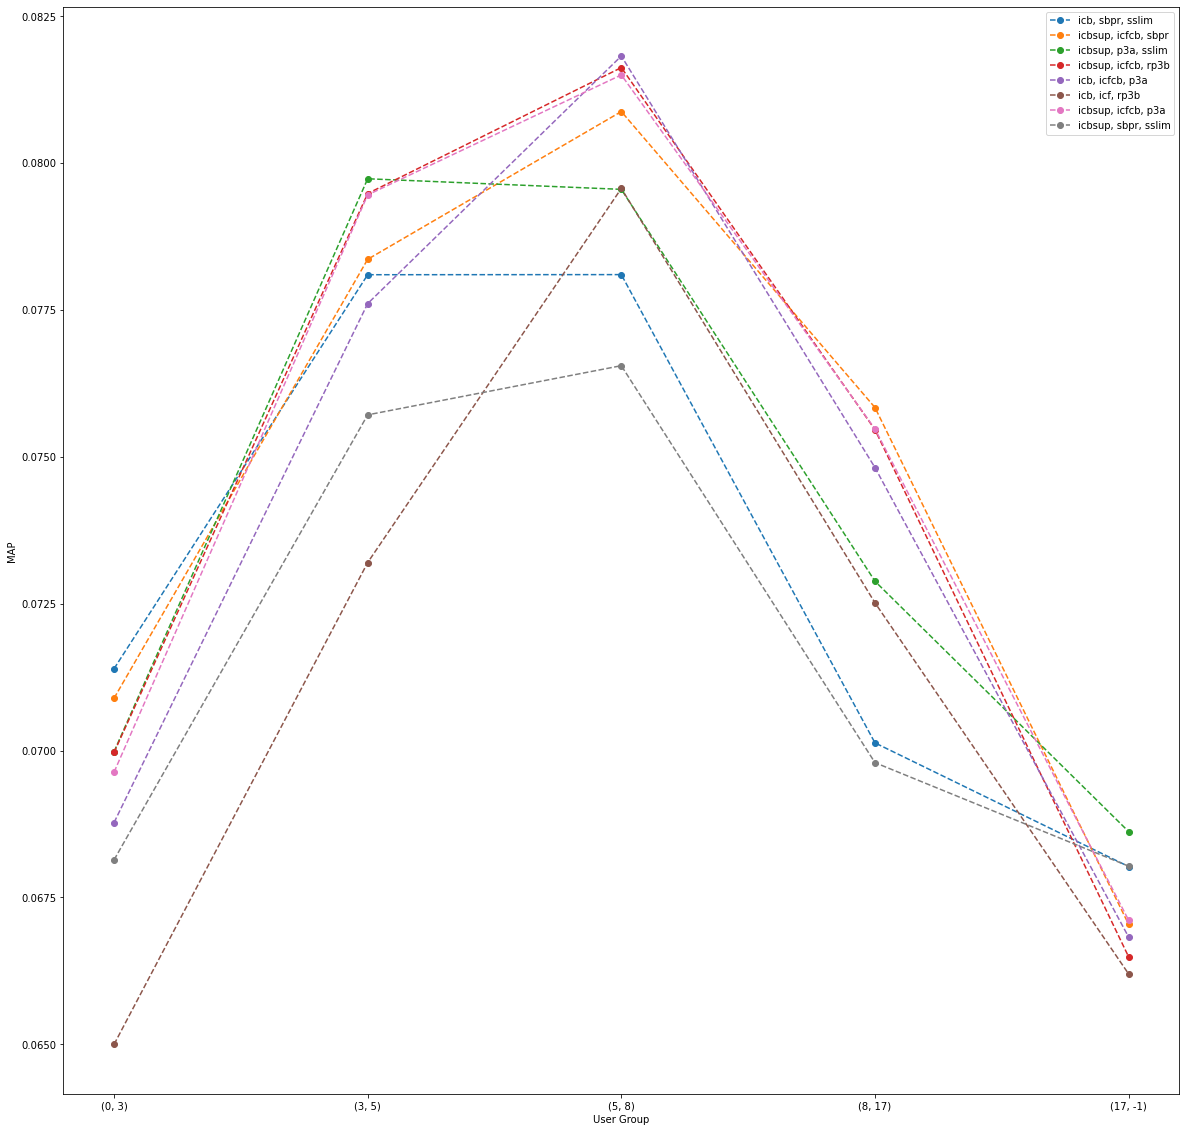

In [22]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        if random.random() > 0.5:
            style = '--o'
        else:
            style = '--x'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

In [19]:
f_ranges = [
    (0,3),
    (3,6),
    (6,12),
    (12,100),
    (100,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            if not isinstance(list_rec[k][0], list):
                rec = list_rec[k][0]
                try:
                    rec = rec(URM_list[i], ICM_all, verbose = False)
                except:
                    rec = rec(URM_list[i], verbose=False)
                try:
                    rec.load_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search3/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
                    print(f"{rec.RECOMMENDER_NAME} loaded. [seed={seed}, fold={i}]")
                except:
                    print(f"Fitting {rec.RECOMMENDER_NAME} ... [seed={seed}, fold={i}]")
                    rec.fit(**list_rec[k][1])
                    print(f"done.")
                    rec.save_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search3/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
            else:
                rec = HybridCombinationSearchCV3(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
                rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.30 sec. Users per second: 881
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.27 sec. Users per second: 843
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
Evalua

EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.26 sec. Users per second: 900
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.24 sec. Users per second: 883
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.17 sec. Users per second: 902
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loade

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.33 sec. Users per second: 857
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.24 sec. Users per second: 864
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.34 sec. Users per second: 846
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.29 sec. Users per second: 846
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.32 sec. Users per second: 801
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.37 sec. Users per second: 837
HybridCombinationSearchCV3: URM De

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.21 sec. Users per second: 886
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.22 sec. Users per second: 929
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.21 sec. Users per second: 901
HybridCombinationSearchCV3: URM De

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.10 sec. Users per second: 962
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.34 sec. Users per second: 851
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.14 sec. Users per second: 942
HybridCombinationSearchCV3: URM Detected 56 (0.7

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.32 sec. Users per second: 857
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.37 sec. Users per second: 796
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.16 sec. Users per second: 911
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.85 sec. Users per second: 620
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.78 sec. Users per second: 600
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.77 sec. Users per second: 640
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hybri

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.84 sec. Users per second: 593
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.72 sec. Users per second: 614
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.72 sec. Users per second: 664
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) c

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.60 sec. Users per second: 669
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.65 sec. Users per second: 686
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.65 sec. Users per second: 660
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
Hybri

SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 0.68 sec. Users per second: 1604
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 0.64 sec. Users per second: 1650
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 0.73 sec. Users per second: 1564
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 0.67 sec. Users per second: 1590
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 0.70 sec. Users per second: 1613
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 0.78 sec. Users per second: 1403
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 0.65 sec. Users per second: 1631
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldou

HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 1.65 sec. Users per second: 863
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1451 ( 100.00% ) in 1.63 sec. Users per second: 888
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
Evalua

EvaluatorHoldout: Processed 1470 ( 100.00% ) in 1.64 sec. Users per second: 895
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 1.50 sec. Users per second: 936
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 1.51 sec. Users per second: 963
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender l

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 1.69 sec. Users per second: 846
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1451 ( 100.00% ) in 1.67 sec. Users per second: 866
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1470 ( 100.00% ) in 1.69 sec. Users per second: 867
HybridCombinationSearchCV3: URM Detected

HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 1.76 sec. Users per second: 797
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 1.81 sec. Users per second: 802
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=16

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 1.82 sec. Users per second: 783
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1451 ( 100.00% ) in 1.79 sec. Users per second: 810
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1470 ( 100.00% ) in 1.84 sec. Users per second: 800
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSe

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 1.68 sec. Users per second: 833
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 1.77 sec. Users per second: 819
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 1.74 sec. Users per second: 821
HybridCombinationSearchCV3: URM Detected 65 (0.82 %)

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1451 ( 100.00% ) in 1.72 sec. Users per second: 843
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1470 ( 100.00% ) in 1.75 sec. Users per second: 838
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 1.73 sec. Users per second: 812
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) col

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 2.35 sec. Users per second: 617
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 2.38 sec. Users per second: 598
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1451 ( 100.00% ) in 2.41 sec. Users per second: 603
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1470 ( 100.00% ) in 2.38 sec. Users per second: 618
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 2.26 sec. Users per second: 620
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 2.41 sec. Users per second: 603
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
H

P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 0.89 sec. Users per second: 1584
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 0.93 sec. Users per second: 1568
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 0.86 sec. Users per second: 1649
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1451 ( 100.00% ) in 0.85 sec. Users per second: 1697
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1470 ( 100.00% ) in 0.86 sec. Users per second: 1702
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 0.91 sec. Users per second: 1540
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 0.91 sec. Users per second: 1588
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 0.8

PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 1.13 sec. Users per second: 1237
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 1.19 sec. Users per second: 1217
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 1.17 sec. Users per second: 1219
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1451 ( 100.00% ) in 1.18 sec. Users per second: 1229
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1470 ( 100.00% ) in 1.23 sec. Users per second: 1199
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1402 ( 100.00% ) in 0.99 sec. Users per second: 1412
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1452 ( 100.00% ) in 1.07 sec. Users per second: 1357
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1426 ( 100.00% ) in 

HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1443 ( 100.00% ) in 1.69 sec. Users per second: 852
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1399 ( 100.00% ) in 1.63 sec. Users per second: 856
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
Eval

EvaluatorHoldout: Processed 1424 ( 100.00% ) in 1.86 sec. Users per second: 764
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1393 ( 100.00% ) in 1.86 sec. Users per second: 748
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1435 ( 100.00% ) in 1.87 sec. Users per second: 769
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKN

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1443 ( 100.00% ) in 2.02 sec. Users per second: 713
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1399 ( 100.00% ) in 1.82 sec. Users per second: 767
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1424 ( 100.00% ) in 1.94 sec. Users per second: 734
HybridCombinationSearchCV3: URM De

HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1393 ( 100.00% ) in 1.91 sec. Users per second: 731
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1435 ( 100.00% ) in 2.09 sec. Users per second: 688
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=16

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1443 ( 100.00% ) in 1.88 sec. Users per second: 766
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1399 ( 100.00% ) in 1.88 sec. Users per second: 745
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1424 ( 100.00% ) in 2.06 sec. Users per second: 690
HybridCombinationSearchCV3: URM Detected 68 (0.86 %)

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1393 ( 100.00% ) in 1.85 sec. Users per second: 752
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1435 ( 100.00% ) in 1.92 sec. Users per second: 746
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1443 ( 100.00% ) in 1.86 sec. Users per second: 774
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1399 ( 100.00% ) in 1.86 sec. Users per second: 751
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1424 ( 100.00% ) in 2.61 sec. Users per second: 546
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1393 ( 100.00% ) in 2.76 sec. Users per second: 504
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1435 ( 100.00% ) in 2.71 sec. Users per second: 530
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1443 ( 100.00% ) in 2.73 sec. Users per second: 529
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1399 ( 100.00% ) in 2.55 sec. Users per second: 549
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1424 ( 100.00% ) in 2.35 sec. Users per second: 607
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1393 ( 100.00% ) in 2.39 sec. Users per second: 583
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1435 ( 100.00% ) in 2.49 sec. Users per second: 577
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hybri

EvaluatorHoldout: Processed 1393 ( 100.00% ) in 0.85 sec. Users per second: 1632
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1435 ( 100.00% ) in 0.88 sec. Users per second: 1632
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1443 ( 100.00% ) in 0.92 sec. Users per second: 1568
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1399 ( 100.00% ) in 0.88 sec. Users per second: 1584
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1424 ( 100.00% ) in 0.86 sec. Users per second: 1657
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1393 ( 100.00% ) in 0.84 sec. Users per second: 1659
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1435 ( 100.00% ) in 0.92 sec. Users per second: 1563
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1443 ( 100.00% ) in 0.92 sec. Users per second: 1568
ItemK

HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.32 sec. Users per second: 660
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 2.31 sec. Users per second: 665
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
Evalua

P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1517 ( 100.00% ) in 2.20 sec. Users per second: 689
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1543 ( 100.00% ) in 2.18 sec. Users per second: 708
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1547 ( 100.00% ) in 2.14 sec. Users per second: 723
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loade

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.57 sec. Users per second: 596
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 2.57 sec. Users per second: 598
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1517 ( 100.00% ) in 2.57 sec. Users per second: 591
HybridCombinationSearchCV3: URM Detected

HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1543 ( 100.00% ) in 2.75 sec. Users per second: 560
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1547 ( 100.00% ) in 3.08 sec. Users per second: 502
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [s

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 3.06 sec. Users per second: 500
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 3.07 sec. Users per second: 501
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1517 ( 100.00% ) in 2.96 sec. Users per second: 512
HybridCombinationSearchCV3: URM De

HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1543 ( 100.00% ) in 3.05 sec. Users per second: 506
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1547 ( 100.00% ) in 2.68 sec. Users per second: 577
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold

P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.56 sec. Users per second: 598
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 2.56 sec. Users per second: 601
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1517 ( 100.00% ) in 2.51 sec. Users per second: 603
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loa

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1543 ( 100.00% ) in 3.98 sec. Users per second: 388
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1547 ( 100.00% ) in 3.77 sec. Users per second: 411
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 3.59 sec. Users per second: 427
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
Hyb

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 4.14 sec. Users per second: 371
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1517 ( 100.00% ) in 4.10 sec. Users per second: 370
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1543 ( 100.00% ) in 4.20 sec. Users per second: 367
HybridCombinationSearchCV3: URM Detected 48 (0

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1547 ( 100.00% ) in 3.44 sec. Users per second: 450
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 3.25 sec. Users per second: 471
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 3.18 sec. Users per second: 484
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hybri

SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.31 sec. Users per second: 1167
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 1.41 sec. Users per second: 1087
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1517 ( 100.00% ) in 1.39 sec. Users per second: 1093
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1543 ( 100.00% ) in 1.47 sec. Users per second: 1048
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1547 ( 100.00% ) in 1.74 sec. Users per second: 888
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.69 sec. Users per second: 904
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1537 ( 100.00% ) in 1.68 sec. Users per second: 914
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Pr

RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.32 sec. Users per second: 322
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.34 sec. Users per second: 302
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.38 sec. Users per second: 277
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.25 sec. Users per second: 422
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.24 sec. Users per second: 437
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.25 sec. Users per second: 407
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold use

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.38 sec. Users per second: 272
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.39 sec. Users per second: 264
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.38 sec. Users per second: 278
HybridCombinationSearchCV3: URM Detected 77

HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.48 sec. Users per second: 215
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.45 sec. Users per second: 227
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=16

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.51 sec. Users per second: 204
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.49 sec. Users per second: 211
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.51 sec. Users per second: 208
HybridCombinationSearchCV3: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.37 sec. Users per second: 282
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.41 sec. Users per second: 246
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.43 sec. Users per second: 242
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.36 sec. Users per second: 287
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.36 sec. Users per second: 294
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.35 sec. Users per second: 299
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold use

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.54 sec. Users per second: 188
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.54 sec. Users per second: 189
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.52 sec. Users per second: 200
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hy

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.59 sec. Users per second: 180
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.59 sec. Users per second: 176
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.54 sec. Users per second: 189
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
Hybrid

RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.16 sec. Users per second: 683
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.16 sec. Users per second: 666
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.14 sec. Users per second: 713
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.15 sec. Users per second: 684
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.15 sec. Users per second: 686
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.14 sec. Users per second: 753
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.14 sec. Users per second: 740
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.18 sec. Users per se

S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.36 sec. Users per second: 298
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.32 sec. Users per second: 322
PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.09 sec. Users per second: 1088
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 103 ( 100.00% ) in 0.08 sec. Users per second: 1318
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.08 sec. Users per second: 1331
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 106 ( 100.00% ) in 0.09 sec. Users per second: 1131
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 104 ( 100.00% ) in 0.08 sec. Users per second: 1271
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 102 ( 100.00% ) in 0.22 sec. Users per 

In [23]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    old_maxp=0
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
        elif value > old_maxp:
            difference=maxp - value
            old_maxp=value
            old_name=combo_labels['combo'+str(key+1)]
            old_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

RANGE (0, 3)
> MAP combo-icb, icf, p3a:	 0.06474931369262016
> MAP combo-icb, icf, rp3b:	 0.06500029236303792
> MAP combo-icb, icf, ucf:	 0.06363190600262157
> MAP combo-icb, rp3b, p3a:	 0.06510243113239321
> MAP combo-icb, ucf, p3a:	 0.06803465666239525
> MAP combo-icb, ucf, rp3b:	 0.0664798777960184
> MAP combo-icb, icfcb, icf:	 0.06869084116414374
> MAP combo-icb, icfcb, p3a:	 0.06877533145641564
> MAP combo-icb, icfcb, rp3b:	 0.06909548333186183
> MAP combo-icb, icfcb, ucf:	 0.06929929339228114
> MAP combo-icb, icfcb, sbpr:	 0.06963134653995043
> MAP combo-icbsup, icfcb, icf:	 0.06775322798478764
> MAP combo-icbsup, icfcb, p3a:	 0.06963275574616393
> MAP combo-icbsup, icfcb, rp3b:	 0.06996848023410623
> MAP combo-icbsup, icfcb, ucf:	 0.06853026425809057
> MAP combo-icbsup, icfcb, sbpr:	 0.0708910268185396
> MAP combo-icbsup, icf, p3a:	 0.06729558862627413
> MAP combo-icbsup, icfcb, rp3b:	 0.06960873049906709
> MAP combo-icbsup, icf, ucf:	 0.06539476428562532
> MAP combo-icbsup, icf

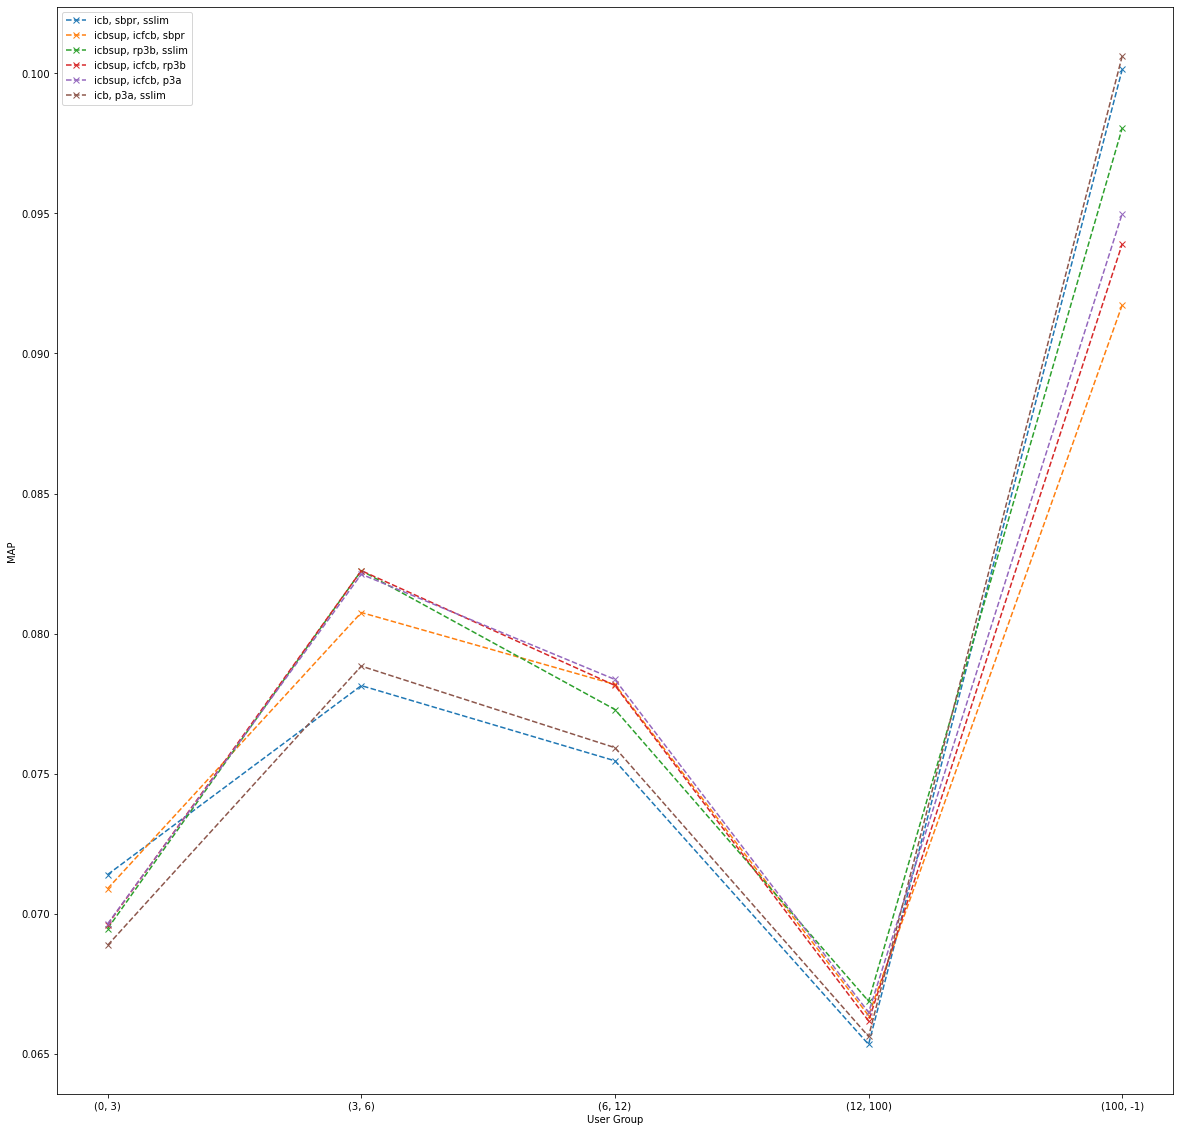

In [26]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        if random.random() > 0.5:
            style = '--o'
        else:
            style = '--x'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

---
### 4 Range

In [27]:
f_ranges = [
    (0,5),
    (5,10),
    (10,22),
    (22,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            if not isinstance(list_rec[k][0], list):
                rec = list_rec[k][0]
                try:
                    rec = rec(URM_list[i], ICM_all, verbose = False)
                except:
                    rec = rec(URM_list[i], verbose=False)
                try:
                    rec.load_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search3/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
                    print(f"{rec.RECOMMENDER_NAME} loaded. [seed={seed}, fold={i}]")
                except:
                    print(f"Fitting {rec.RECOMMENDER_NAME} ... [seed={seed}, fold={i}]")
                    rec.fit(**list_rec[k][1])
                    print(f"done.")
                    rec.save_model(f'stored_recommenders/seed_{str(seed)}_hybrid_search3/{rec.RECOMMENDER_NAME}/', f'{str(seed)}_fold-{str(i)}')
            else:
                rec = HybridCombinationSearchCV3(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
                rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 2128 ( 100.00% ) in 2.34 sec. Users per second: 909
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.30 sec. Users per second: 907
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
Evalua

EvaluatorHoldout: Processed 2131 ( 100.00% ) in 2.18 sec. Users per second: 977
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 2.23 sec. Users per second: 944
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.16 sec. Users per second: 963
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loade

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 2128 ( 100.00% ) in 2.41 sec. Users per second: 881
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.23 sec. Users per second: 934
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 2131 ( 100.00% ) in 2.28 sec. Users per second: 937
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 2.30 sec. Users per second: 915
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.35 sec. Users per second: 886
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 2128 ( 100.00% ) in 2.41 sec. Users per second: 881
HybridCombinationSearchCV3: URM De

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.41 sec. Users per second: 863
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 2131 ( 100.00% ) in 2.48 sec. Users per second: 860
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 2.46 sec. Users per second: 857
HybridCombinationSearchCV3: URM De

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.38 sec. Users per second: 878
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 2128 ( 100.00% ) in 2.38 sec. Users per second: 893
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.30 sec. Users per second: 906
HybridCombinationSearchCV3: URM Detected 56 (0.7

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 2131 ( 100.00% ) in 2.30 sec. Users per second: 928
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 2.37 sec. Users per second: 891
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 2.34 sec. Users per second: 891
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold 

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 2128 ( 100.00% ) in 3.21 sec. Users per second: 663
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 3.21 sec. Users per second: 650
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 2131 ( 100.00% ) in 3.31 sec. Users per second: 643
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hybri

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 3.30 sec. Users per second: 638
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 3.24 sec. Users per second: 644
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 2128 ( 100.00% ) in 3.20 sec. Users per second: 665
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) c

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 3.03 sec. Users per second: 688
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 2131 ( 100.00% ) in 3.20 sec. Users per second: 665
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 3.21 sec. Users per second: 657
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
Hybri

SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 1.22 sec. Users per second: 1722
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 1.24 sec. Users per second: 1686
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 2128 ( 100.00% ) in 1.36 sec. Users per second: 1569
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 1.36 sec. Users per second: 1529
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 2131 ( 100.00% ) in 1.35 sec. Users per second: 1581
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 2107 ( 100.00% ) in 1.36 sec. Users per second: 1545
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 2085 ( 100.00% ) in 1.30 sec. Users per second: 1603
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldou

HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.82 sec. Users per second: 853
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 1.85 sec. Users per second: 842
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
Evalua

EvaluatorHoldout: Processed 1522 ( 100.00% ) in 1.65 sec. Users per second: 922
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.77 sec. Users per second: 872
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.68 sec. Users per second: 913
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender l

ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.92 sec. Users per second: 809
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 2.04 sec. Users per second: 762
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 1.94 sec. Users per second: 783
HybridCombinationSearchCV3: URM Detected

HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 2.14 sec. Users per second: 723
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.99 sec. Users per second: 770
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=16

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 2.13 sec. Users per second: 730
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 2.06 sec. Users per second: 755
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 2.01 sec. Users per second: 757
HybridCombinationSearchCV3: URM De

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 2.17 sec. Users per second: 713
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.01 sec. Users per second: 763
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 2.16 sec. Users per second: 719
HybridCombinationSearchCV3: URM Detected 65 (0.82 %)

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 2.06 sec. Users per second: 757
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 2.02 sec. Users per second: 755
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.98 sec. Users per second: 781
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) col

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.73 sec. Users per second: 561
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 2.65 sec. Users per second: 588
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 2.71 sec. Users per second: 575
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 2.68 sec. Users per second: 568
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 2.48 sec. Users per second: 621
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.48 sec. Users per second: 618
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
H

P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 0.93 sec. Users per second: 1661
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 0.93 sec. Users per second: 1647
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 0.97 sec. Users per second: 1609
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 0.93 sec. Users per second: 1682
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 0.92 sec. Users per second: 1653
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.02 sec. Users per second: 1514
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.00 sec. Users per second: 1529
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.0

PureSVDRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.22 sec. Users per second: 1262
PureSVDRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.29 sec. Users per second: 1191
PureSVDRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 1.26 sec. Users per second: 1237
PureSVDRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 1.24 sec. Users per second: 1255
PureSVDRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 1.19 sec. Users per second: 1277
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 1.13 sec. Users per second: 1363
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.18 sec. Users per second: 1299
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 

EvaluatorHoldout: Processed 1096 ( 100.00% ) in 1.39 sec. Users per second: 790
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 1.40 sec. Users per second: 788
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1130 ( 100.00% ) in 1.42 sec. Users per second: 797
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1107 ( 100.00% ) in 1.64 sec. Users per second: 677
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 1.66 sec. Users per second: 664
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1096 ( 100.00% ) in 1.63 sec. Users per second: 671
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSe

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 1.60 sec. Users per second: 690
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1130 ( 100.00% ) in 1.65 sec. Users per second: 685
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1107 ( 100.00% ) in 1.69 sec. Users per second: 655
HybridCombinationSearchCV3: URM De

HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 1.82 sec. Users per second: 607
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1096 ( 100.00% ) in 1.73 sec. Users per second: 632
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=16

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 1.61 sec. Users per second: 683
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1130 ( 100.00% ) in 1.71 sec. Users per second: 661
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1107 ( 100.00% ) in 1.78 sec. Users per second: 623
HybridCombinationSearchCV3: URM Detected 68 (0.86 %)

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 1.92 sec. Users per second: 573
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1096 ( 100.00% ) in 1.70 sec. Users per second: 645
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 1.78 sec. Users per second: 619
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1130 ( 100.00% ) in 1.88 sec. Users per second: 602
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1107 ( 100.00% ) in 2.47 sec. Users per second: 447
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 2.48 sec. Users per second: 445
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold us

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1096 ( 100.00% ) in 2.38 sec. Users per second: 460
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 2.33 sec. Users per second: 473
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1130 ( 100.00% ) in 2.34 sec. Users per second: 483
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.

ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1107 ( 100.00% ) in 2.14 sec. Users per second: 516
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 2.28 sec. Users per second: 483
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1096 ( 100.00% ) in 2.14 sec. Users per second: 511
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
Hybri

EvaluatorHoldout: Processed 1103 ( 100.00% ) in 0.79 sec. Users per second: 1395
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1096 ( 100.00% ) in 0.74 sec. Users per second: 1486
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 0.71 sec. Users per second: 1552
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1130 ( 100.00% ) in 0.73 sec. Users per second: 1550
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1107 ( 100.00% ) in 0.78 sec. Users per second: 1426
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 0.75 sec. Users per second: 1478
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1096 ( 100.00% ) in 0.73 sec. Users per second: 1512
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1103 ( 100.00% ) in 0.76 sec. Users per second: 1455
ItemK

EvaluatorHoldout: Processed 840 ( 100.00% ) in 1.47 sec. Users per second: 570
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 1.51 sec. Users per second: 550
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100.00% ) in 1.66 sec. Users per second: 514
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender load

RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 841 ( 100.00% ) in 1.40 sec. Users per second: 603
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 1.43 sec. Users per second: 586
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 840 ( 100.00% ) in 1.27 sec. Users per second: 660
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.3

ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 1.73 sec. Users per second: 480
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100.00% ) in 1.81 sec. Users per second: 470
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 841 ( 100.00% ) in 1.71 sec. Users per second: 491
HybridCombinationSearchCV3: URM Detected 77

ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 2.16 sec. Users per second: 388
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 840 ( 100.00% ) in 2.33 sec. Users per second: 360
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 2.27 sec. Users per second: 366
HybridCombinationSearchCV3: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100.00% ) in 2.18 sec. Users per second: 390
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 841 ( 100.00% ) in 2.05 sec. Users per second: 411
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 2.07 sec. Users per second: 405
HybridCombinationSearchCV3: URM Detec

Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 840 ( 100.00% ) in 1.81 sec. Users per second: 463
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 1.77 sec. Users per second: 469
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100.00% ) in 1.93 sec. Users per second: 441
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) co

Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 841 ( 100.00% ) in 1.87 sec. Users per second: 451
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 1.82 sec. Users per second: 462
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 840 ( 100.00% ) in 1.92 sec. Users per second: 437
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold use

Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
P3alphaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 2.41 sec. Users per second: 344
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCV3: URM Detected 2402 (9.25 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100.00% ) in 2.46 sec. Users per second: 346
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 841 ( 100.00% ) in 2.42 sec. Users per second: 347
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCo

Special-ItemKNNCBFRec loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 2.80 sec. Users per second: 299
HybridCombinationSearchCV3: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCV3: URM Detected 2381 (9.17 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=0]
RP3betaRecommender loaded. [seed=1666, fold=0]
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 840 ( 100.00% ) in 2.58 sec. Users per second: 325
HybridCombinationSearchCV3: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCV3: URM Detected 2439 (9.39 %) cold items.
Special-ItemKNNCBFRec loaded. [seed=1666, fold=1]
RP3betaRecommender loaded. [seed=1666, fold=1]
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 2.48 sec. Users per second: 335
HybridCombinationSearchCV3: URM Detected 56 (0.70 %) cold users.


ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender loaded. [seed=1666, fold=2]
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100.00% ) in 2.21 sec. Users per second: 386
HybridCombinationSearchCV3: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCV3: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender loaded. [seed=1666, fold=3]
S-SLIMElasticNet loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 841 ( 100.00% ) in 2.15 sec. Users per second: 392
HybridCombinationSearchCV3: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCV3: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender loaded. [seed=1666, fold=4]
S-SLIMElasticNet loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 2.04 sec. Users per second: 410
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processe

ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 840 ( 100.00% ) in 1.16 sec. Users per second: 725
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 1.08 sec. Users per second: 766
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100.00% ) in 1.13 sec. Users per second: 751
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 841 ( 100.00% ) in 1.10 sec. Users per second: 766
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 1.22 sec. Users per second: 689
S-SLIMElasticNet loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 840 ( 100.00% ) in 1.30 sec. Users per second: 645
S-SLIMElasticNet loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 829 ( 100.00% ) in 1.35 sec. Users per second: 613
S-SLIMElasticNet loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 851 ( 100

In [28]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    old_maxp=0
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
        elif value > old_maxp:
            difference=maxp - value
            old_maxp=value
            old_name=combo_labels['combo'+str(key+1)]
            old_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

RANGE (0, 5)
> MAP combo-icb, icf, p3a:	 0.06952926761728087
> MAP combo-icb, icf, rp3b:	 0.06929604869093683
> MAP combo-icb, icf, ucf:	 0.06813045616110953
> MAP combo-icb, rp3b, p3a:	 0.06926572000015238
> MAP combo-icb, ucf, p3a:	 0.07104663156709558
> MAP combo-icb, ucf, rp3b:	 0.07047161317827338
> MAP combo-icb, icfcb, icf:	 0.07235379367055042
> MAP combo-icb, icfcb, p3a:	 0.07315049424580614
> MAP combo-icb, icfcb, rp3b:	 0.07346281805585686
> MAP combo-icb, icfcb, ucf:	 0.07315280370017478
> MAP combo-icb, icfcb, sbpr:	 0.07338104203163517
> MAP combo-icbsup, icfcb, icf:	 0.07193623410399017
> MAP combo-icbsup, icfcb, p3a:	 0.0744120174932406
> MAP combo-icbsup, icfcb, rp3b:	 0.07445055238888965
> MAP combo-icbsup, icfcb, ucf:	 0.07254720592340981
> MAP combo-icbsup, icfcb, sbpr:	 0.07424196889134516
> MAP combo-icbsup, icf, p3a:	 0.07319654543970452
> MAP combo-icbsup, icfcb, rp3b:	 0.07442066376388037
> MAP combo-icbsup, icf, ucf:	 0.07096845812199129
> MAP combo-icbsup, ic

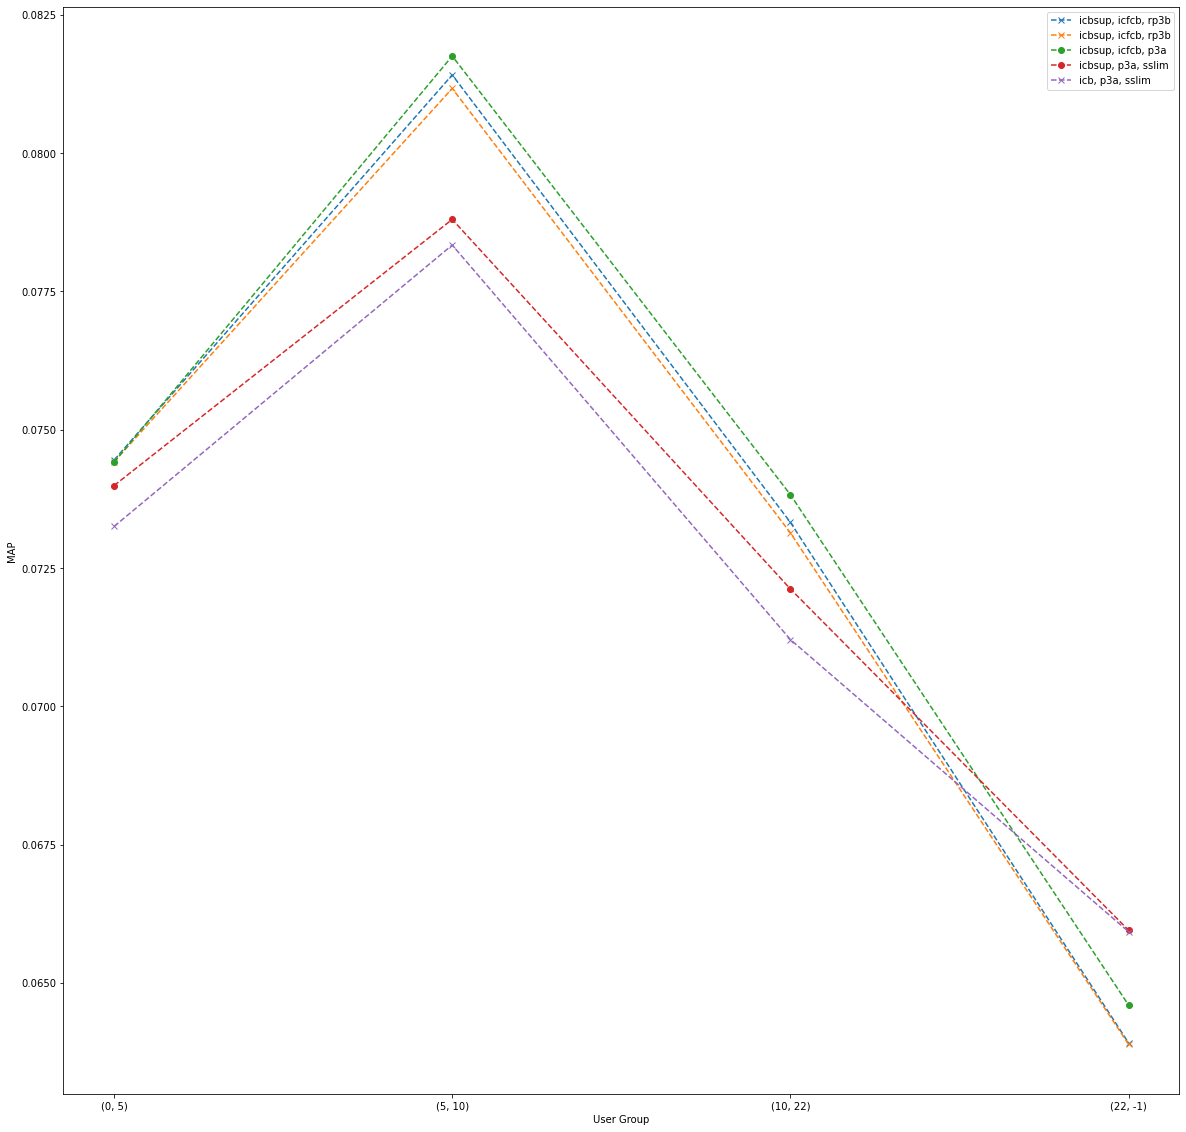

In [29]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        if random.random() > 0.5:
            style = '--o'
        else:
            style = '--x'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

---
### Fine-grained ranges